In [1]:
"""Running basic code:
Importing packages, setting working directory, 
printing out date"""

import os as os
os.chdir('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/')
import datetime as dt
str(dt.datetime.now())
from sklearn.metrics import confusion_matrix
import seaborn as sns
#from pandas_ml import ConfusionMatrix
data_path = 'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/data/'
output_path = 'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/'
from HPnex import functions as f
from HPnex import classification as classify
from HPnex import fitting_functions as fitt
from HPnex import prediction as pred
from HPnex import predict_multi as pred_multi


import numpy as np
import networkx as nx
#np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
#from pandas_ml import ConfusionMatrix
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import model_selection
import math
height = 6
font = 12

import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import
from sklearn.model_selection import StratifiedKFold ,cross_val_score, train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import learning_curve
#from pandas_ml import ConfusionMatrix
from textblob import TextBlob
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
#### Standardize continuous variables
from sklearn.preprocessing import StandardScaler
from sklearn  import preprocessing
#from pandas_ml import ConfusionMatrix
from HPnex import functions as f
### Running cross validation scores and predictions
from sklearn.model_selection import StratifiedKFold ,cross_val_score, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['font.family'] = 'Times New Roman'
sns.set_context("notebook", font_scale=1.30, rc={"lines.linewidth": 0.8})
import itertools as itertools
import pandas as pd
import joblib
IUCN = pd.read_csv(data_path+ '\IUCN Mammals, Birds, Reptiles, and Amphibians.csv',encoding='latin1')
IUCN["ScientificName"] = IUCN["Genus"].map(str) +' '+IUCN["Species"]
IUCN_list = set(IUCN.ScientificName.unique().tolist())
IUCN.loc[IUCN.ScientificName== 'Homo sapiens', 'Order'] = 'Humans'
np.random.seed(42)

C:\Users\falco\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\falco\anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\falco\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_pickle(data_path + '\species_hp_updated.pickle')
data['Virus'] = data.virus_name
data = data[data.ScientificName != 'Pelophylax ridibundus'];
data = data[data.ScientificName != 'Crocodylus moreletii']
data = data[data.ScientificName != 'unknown unknown']
data = data[data.ScientificName != 'Anaxyrus fowleri']
data = data[data.ScientificName != 'spp.']
data = data[data.ScientificName != '']
data = data[data.ScientificName != 'Sturnidae']
data = data[data.ScientificName != 'Apodemus']
data.replace('Gis Glis', 'Glis glis', inplace= True)
data.replace('Murina  aurata', 'Murina aurata', inplace= True)
data.replace('Liomys adspersus', 'Heteromys adspersus', inplace= True)
data.replace('Oreothlypis ruficapilla', 'Vermivora ruficapilla', inplace= True)
data.replace('Streptopelia chinensis', 'Spilopelia chinensis', inplace= True)
data.replace('Haemorhous mexicanus', 'Carpodacus mexicanus', inplace= True)
data.replace('Pseudalopex vetulus', 'Lycalopex vetulus', inplace= True)
data.replace('Sigmondon toltecus', 'Sigmodon toltecus', inplace= True)
data.replace('Milvago chimango', 'Milvago chimachima', inplace= True)
data.replace('Spinus tristis', 'Carduelis tristis', inplace= True)
data.replace('Alopex lagopus', 'Vulpes lagopus', inplace= True)
data.replace('Clethrionomys rufocanus', 'Myodes rufocanus', inplace= True)
data.replace('Ichthyaetus leucophthalmus', 'Larus leucophthalmus', inplace= True)
data.replace('Pan troglodyte', 'Pan troglodytes', inplace= True)
data.replace('Poecile atricapillus', 'Parus atricapillus', inplace= True)
data.replace('Poecile carolinensis', 'Parus carolinensis', inplace= True)
data.replace('Erythacus rubecula', 'Erithacus rubecula', inplace= True)
data.replace('Micoureus demerarae', 'Marmosa demerarae', inplace= True)
#data.replace('', '', inplace= True)


data['virus_name_old'] = data.virus_name
data['virus_name'] = data.species
data['VF'] = data.iloc[:,[19]]
data.drop('viral_family', axis=1, inplace= True)
data['viral_family'] = data['VF']
data.columns.get_loc('viral_family')
data.viral_family.fillna('Not_Assinged', inplace= True)

virus_df = data.groupby(
    ['virus_name', 'viral_family',
     'PubMed_Search_ln']).size().reset_index()
virus_df['group'] = np.random.randint(1, 11, virus_df.shape[0])
virus_df['group'].value_counts()
virus_df.head()

data_species_list = set(data.ScientificName.unique().tolist())
IUCN = pd.read_csv(data_path+ '\IUCN Mammals, Birds, Reptiles, and Amphibians.csv',)
IUCN["ScientificName"] = IUCN["Genus"].map(str) +' '+IUCN["Species"]
IUCN_list = set(IUCN.ScientificName.unique().tolist())
missing_names = list(data_species_list.difference(IUCN_list))
missing_names
df = pd.merge(
    data, virus_df[['virus_name', 'group']], on='virus_name', how='left')

IUCN.loc[IUCN.ScientificName== 'Homo sapiens', 'Order'] = 'Humans'
df = pd.merge(df, IUCN[['ScientificName', 'Order']], on= 'ScientificName', how='left')
df['PubMed_Search'].fillna(1, inplace = True)
df['PubMed_Search'] = df['PubMed_Search']+1

In [3]:
%%time
clf_binary = joblib.load('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Binary_model_v2.joblib')
clf_multi = joblib.load('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Multiclass_model_humans_v2.joblib')

Wall time: 776 ms


In [4]:
%%time
BPnx  = nx.read_graphml("C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/BPnx_Order_humans.graphml")
Gc_complete_Order = nx.read_graphml("C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/CompleteNetwork_Order_Humans.graphml")                              

Wall time: 1.33 s


In [5]:
### Encoding categorical variables
virus_df = pd.read_pickle('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/virus_df.pkl')
le = preprocessing.LabelEncoder()
le.fit(virus_df.viral_family.unique())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
import pickle
dictionary = pickle.load(open("C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/dictionary_order_humans.pkl", "rb")) 
inv_dictionary = {v: k for k, v in dictionary.items()}

In [7]:
P_data = pd.read_csv('C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/data/network_prediction_data.csv', low_memory=False)
P_data['ScientificName'] = P_data['ScientificNameToLowestKnownRank']
P_data.ScientificNameToLowestKnownRank.replace('piliocolobus tholloni', 'Piliocolobus tholloni', inplace = True)
P_data['Order'] = P_data.Order.str.upper()
P_data.replace('ARTIODACTYLA', 'CETARTIODACTYLA', inplace=True)
#P_data.head()

In [8]:
P_data.shape

(15085, 8)

In [9]:
#P_data.IDCertainty.value_counts()

In [10]:
uncertain = ['field ID certainty unknown', 'unidentified by barcoding - field ID uncertain']

In [11]:
#P_data[P_data.IDCertainty == 'field ID certainty unknown'].ScientificName.value_counts()

In [12]:
#P_data[P_data.IDCertainty == 'field ID uncertain'].groupby(['Order', 'ScientificName']).size()

In [13]:
#P_data[P_data.IDCertainty == 'field ID uncertain'].groupby(['Order', 'ScientificName']).size().xs('PRIMATES', level =0)

In [14]:
print('There were %s unique viruses detected in P1P2' %(len(P_data.VirusGroup.unique())))
print('There were %s unique novel viruses detected in P1P2' %(len(P_data[P_data.VirusStatus == 'new'].VirusGroup.unique())))
print('There were %s unique novel viruses detected wildlife (excluding humans)' %(len(P_data[(P_data.VirusStatus == 'new') &(P_data.Order !='HUMANS')].VirusGroup.unique())))
print('There were %s unique novel viruses detected wildlife (excluding humans) correctly identified species' %(len(P_data[(P_data.VirusStatus == 'new') &(P_data.Order !='HUMANS') & (~P_data.IDCertainty.isin(uncertain))].VirusGroup.unique())))

There were 1170 unique viruses detected in P1P2
There were 951 unique novel viruses detected in P1P2
There were 951 unique novel viruses detected wildlife (excluding humans)
There were 949 unique novel viruses detected wildlife (excluding humans) correctly identified species


In [15]:
#P_data.groupby(['Order', 'VirusStatus']).ScientificNameToLowestKnownRank.nunique()

In [16]:
P_data_new_certain = P_data[(P_data.VirusStatus == 'new') &(P_data.Order !='HUMANS') & (~P_data.IDCertainty.isin(uncertain))]
P = (P_data_new_certain.groupby(['VirusGroup', 'ViralFamily', 'VirusStatus']).agg({'ScientificName':'unique',
                                                                       'Order':'unique'})).reset_index()
P['PubMed'] = P['ScientificName'].str.len()
P = P[P.ViralFamily!='Bunyaviridae']
P.ViralFamily.replace('Novel', 'Caliciviridae', inplace = True)

In [17]:
new  = P

In [18]:
len(new.VirusGroup.dropna().unique())

944

In [19]:
new.head()

,VirusGroup,ViralFamily,VirusStatus,ScientificName,Order,PubMed
0,Bombali Virus (BOMV),Filoviridae,new,"[Mops condylurus, Chaerephon pumilus]",[CHIROPTERA],2
1,PREDICT_AaV-1,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1
2,PREDICT_AaV-10,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1
3,PREDICT_AaV-11,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1
4,PREDICT_AaV-2,Adenoviridae,new,[Macaca mulatta],[PRIMATES],1


In [20]:
new.ViralFamily.unique()

array(['Filoviridae', 'Adenoviridae', 'Arenaviridae', 'Parvoviridae',
       'Coronaviridae', 'Picornaviridae', 'Flaviviridae', 'Herpesviridae',
       'Retroviridae', 'Astroviridae', 'Caliciviridae', 'Reoviridae',
       'Paramyxoviridae', 'Papillomaviridae', 'Picobirnaviridae',
       'Poxviridae', 'Polyomaviridae', 'Rhabdoviridae'], dtype=object)

In [21]:
len(new.ViralFamily.unique())

18

In [22]:
new['hosts_n'] = new['ScientificName'].str.len()

In [23]:
len(new.VirusGroup.unique())

944

In [24]:
new['hosts_n'].mean() 

1.3241525423728813

In [25]:
new['hosts_n'].std() 

0.9977755333150753

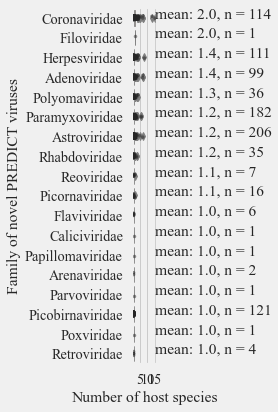

Wall time: 527 ms


In [26]:
%%time
qq = new.groupby('ViralFamily').agg({'hosts_n': ['mean', 'count']})
qq.columns = ['mean', 'count']
qq.sort_values('mean', ascending= False, inplace = True)
order_y = qq.index
f, ax = plt.subplots(figsize = (4,6))
sns.boxplot(data=new, x='hosts_n', y= 'ViralFamily',ax=ax, order = order_y, color="#fdcdac")
sns.stripplot(x='hosts_n', y= 'ViralFamily',
                  data=new,
                  size=3.5,
                  jitter=True,
                  alpha=0.5,
                  color='#252525',order = order_y,
                  ax=ax)
#for i, txt in enumerate(qq['count'].astype(str).values):
#    ax.text(s=txt, x=0.5, y=order_y[i])

qq['String'] = "mean: " +qq['mean'].round(1).astype(str) + ', n = ' +qq['count'].round(1).astype(str)
#df['bar'].astype(str)+'_'+df['foo']+'_'+df['new']
nobs = qq["String"].values
nobs = [i for i in nobs]
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_yticklabels()):
    ax.text(x=15.005, y=pos[tick], s=nobs[tick])
ax.set_xlabel('Number of host species')
ax.set_ylabel('Family of novel PREDICT viruses')
plt.tight_layout()
#f.savefig(output_path + '/human_links.png', dpi=500)
#f.savefig(output_path + '/human_links.svg')
plt.show()

In [27]:
new.ScientificName.head()

0    [Mops condylurus, Chaerephon pumilus]
1                         [Macaca mulatta]
2                         [Macaca mulatta]
3                         [Macaca mulatta]
4                         [Macaca mulatta]
Name: ScientificName, dtype: object

In [28]:
new.iloc[0]

VirusGroup                         Bombali Virus (BOMV)
ViralFamily                                 Filoviridae
VirusStatus                                         new
ScientificName    [Mops condylurus, Chaerephon pumilus]
Order                                      [CHIROPTERA]
PubMed                                                2
hosts_n                                               2
Name: 0, dtype: object

In [29]:
new.iloc[0]['ScientificName']

array(['Mops condylurus', 'Chaerephon pumilus'], dtype=object)

In [30]:
new.iloc[0]['ViralFamily']

'Filoviridae'

Mops condylurus
Chaerephon pumilus


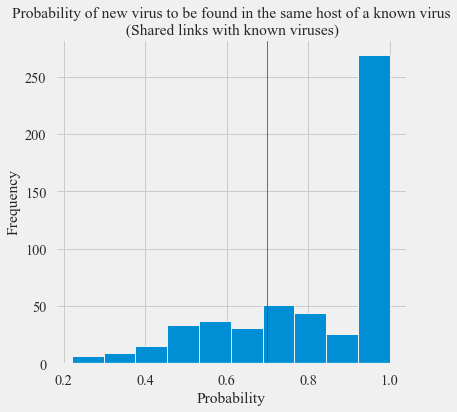

In [31]:
i = 0
a = pred.run_predictions(virus=new.iloc[i]['VirusGroup'],
                         hosts=new.iloc[i]['ScientificName'],
                         PubMed=2,
                         ViralFamily='Filoviridae',
                         BPnx=BPnx,
                         Gc_complete=Gc_complete_Order,
                         virus_df=virus_df,
                         clf_binary=clf_binary,
                         plot=True)

PREDICT_AaV-11
['Macaca mulatta']
1
Adenoviridae


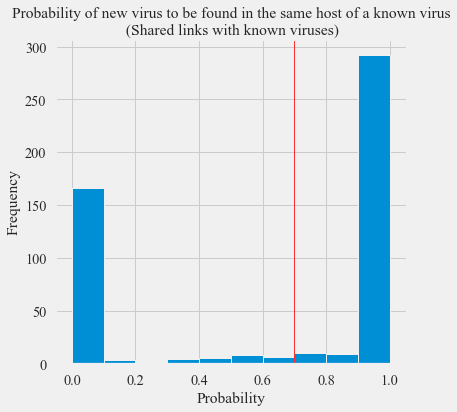

Wall time: 1.52 s


In [32]:
%%time
i = 3
print(new.iloc[i]['VirusGroup'])
print(new.iloc[i]['ScientificName'])
print(new.iloc[i]['PubMed'])
print(new.iloc[i]['ViralFamily'])
a, n_e = pred.run_predictions(virus=new.iloc[i]['VirusGroup'],
                                  hosts=new.iloc[i]['ScientificName'],
                                  PubMed=new.iloc[i]['PubMed'],
                                  ViralFamily=new.iloc[i]['ViralFamily'],
                                  BPnx=BPnx,
                                  Gc_complete=Gc_complete_Order,
                                  virus_df=virus_df,
                                  clf_binary=clf_binary,
                                  plot=True)
if n_e == 0:
    print ('NO PREDICTIONS available for %s as no new connections were made to the known virus network' % (new.iloc[i]['VirusGroup']))

In [33]:
P.iloc[100]['VirusGroup']

'PREDICT_ArenaV-1'

In [34]:
new.iloc[i]['ScientificName']

array(['Macaca mulatta'], dtype=object)

PREDICT_AdV-27
['Macroglossus sobrinus']
1
Adenoviridae


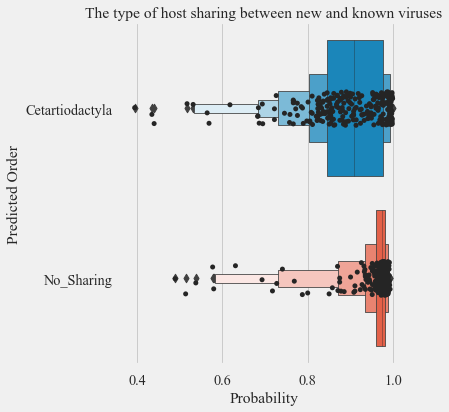

                 mean probability       std  number of links
Link Type                                                   
Cetartiodactyla          0.892574  0.104842              261
No_Sharing               0.952544  0.075132              262
NO PREDICTIONS available for PREDICT_AdV-27 as no new connections were made to the known virus network
Wall time: 2.37 s


In [35]:
%%time

i = 31
print(new.iloc[i]['VirusGroup'])
print(new.iloc[i]['ScientificName'])
print(new.iloc[i]['PubMed'])
print(new.iloc[i]['ViralFamily'])

b, n_e = pred_multi.run_predictions(virus=new.iloc[i]['VirusGroup'],
                                       hosts=new.iloc[i]['ScientificName'],
                                       PubMed=new.iloc[i]['PubMed'],
                                       ViralFamily=new.iloc[i]['ViralFamily'],
                                       BPnx=BPnx,
                                       Gc_complete=Gc_complete_Order,
                                       virus_df=virus_df,
                                       clf_multi=clf_multi,
                                       IUCN = IUCN,
                                       inv_dictionary=inv_dictionary,
                                       plot=True)
if n_e == 0:
    print ('NO PREDICTIONS available for %s as no new connections were made to the known virus network' % (new.iloc[i]['VirusGroup']))

In [36]:
new.shape

(944, 7)

In [37]:
known_virus_host = pd.DataFrame(df.groupby("species").ScientificName.unique())
known_virus_host = known_virus_host.drop('not_found').reset_index()

In [38]:
known_virus_host.head()

,species,ScientificName
0,Adelaide River ephemerovirus,[Bos taurus]
1,Adeno-associated dependoparvovirus A,[Homo sapiens]
2,Adeno-associated dependoparvovirus B,[Homo sapiens]
3,African green monkey polyomavirus,[Chlorocebus aethiops]
4,African swine fever virus,"[Phacochoerus africanus, Potamochoerus porcus,..."


In [39]:
virus_df.head()

,virus_name,viral_family,PubMed_Search_ln,0,group
0,Adelaide River ephemerovirus,Rhabdoviridae,2.079567,1,8
1,Adeno-associated dependoparvovirus A,Parvoviridae,5.505336,1,10
2,Adeno-associated dependoparvovirus B,Parvoviridae,2.484990,1,3
3,African green monkey polyomavirus,Not_Assinged,0.693647,1,6
4,African swine fever virus,Asfarviridae,6.854356,3,2


In [40]:
known_virus_host.shape

(522, 2)

In [41]:
known_virus_host = pd.merge(known_virus_host, virus_df, left_on = "species", right_on = 'virus_name', how = "inner")
known_virus_host = known_virus_host.drop_duplicates(subset='species', keep="first")
known_virus_host["PubMed"] = np.exp(known_virus_host.PubMed_Search_ln)
known_virus_host.shape

(522, 7)

In [42]:
known_virus_host.ScientificName.iloc[0]

array(['Bos taurus'], dtype=object)

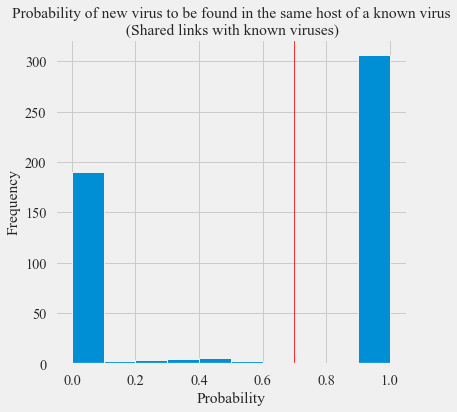

In [56]:
binary, n_e = pred.run_predictions_known(virus=known_virus_host.species.iloc[3],
                                  hosts=known_virus_host.ScientificName.iloc[3],
                                  PubMed=known_virus_host.PubMed.iloc[3],
                                  ViralFamily=known_virus_host.viral_family.iloc[3],
                                  BPnx=BPnx,
                                  Gc_complete=Gc_complete_Order,
                                  virus_df=virus_df,
                                  clf_binary=clf_binary,
                                  plot=True)

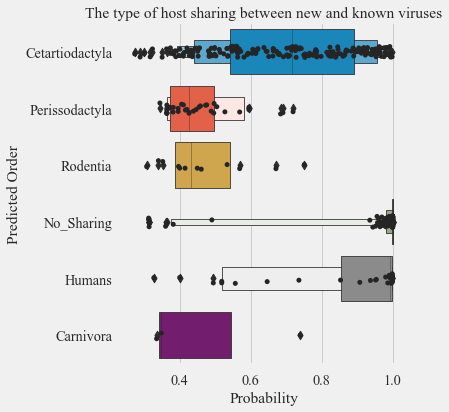

                 mean probability       std  number of links
Link Type                                                   
Carnivora                0.474291  0.229786                3
Cetartiodactyla          0.703496  0.201736              212
Humans                   0.870364  0.209694               33
No_Sharing               0.968835  0.130248              215
Perissodactyla           0.454339  0.099229               37
Rodentia                 0.470551  0.136325               12


In [57]:
multi, n_e = pred_multi.run_predictions_known(virus=known_virus_host.species.iloc[3],
                                       hosts=known_virus_host.ScientificName.iloc[3],
                                       PubMed=known_virus_host.PubMed.iloc[3],
                                       ViralFamily=known_virus_host.viral_family.iloc[3],
                                       BPnx=BPnx,
                                       Gc_complete=Gc_complete_Order,
                                       virus_df=virus_df,
                                       clf_multi=clf_multi,
                                       IUCN = IUCN,
                                       inv_dictionary=inv_dictionary,
                                       plot=True)

In [58]:
%%time
RESULT_binary = []
RESULT_multi = []
for index, row in known_virus_host.iterrows():
    if index % 50 == 0:
        print ('running predictions for '+ row['species']+', virus number '+str(index))
    #for i in range(0, 50):
    binary, n_e = pred.run_predictions_known(virus=row['species'],
                                  hosts=row['ScientificName'],
                                  PubMed=row['PubMed'],
                                  ViralFamily=row['viral_family'],
                                  BPnx=BPnx,
                                  Gc_complete=Gc_complete_Order,
                                  virus_df=virus_df,
                                  clf_binary=clf_binary,
                                  plot=False)
    multi, n_e = pred_multi.run_predictions_known(virus=row['species'],
                                       hosts=row['ScientificName'],
                                       PubMed=row['PubMed'],
                                       ViralFamily=row['viral_family'],
                                       BPnx=BPnx,
                                       Gc_complete=Gc_complete_Order,
                                       virus_df=virus_df,
                                       clf_multi=clf_multi,
                                       IUCN = IUCN,
                                       inv_dictionary=inv_dictionary,
                                       plot=False)
    if n_e == 0:
        print ('NO PREDICTIONS available for %s as no new connections were made to the known virus network' % (row['species']))
    else:
        RESULT_binary.append(binary)
        RESULT_multi.append(multi)

r_binary = pd.concat(RESULT_binary, axis=0)
r_multi = pd.concat(RESULT_multi, axis=0)


r_binary.to_pickle(
    'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Known_PREDICTIONS_binary.pkl'
)


r_multi.to_pickle(
    'C:/Users/Falco/Desktop/directory/Missing_links_in_viral_host_communities/outputs/Known_PREDICTIONS_multi.pkl'
)

running predictions for Adelaide River ephemerovirus, virus number 0
Phacochoerus africanus
Potamochoerus porcus
Sus scrofa
Phacochoerus africanus
Potamochoerus porcus
Sus scrofa
Bos taurus
Equus caballus
Bos taurus
Equus caballus
Bos taurus
Connochaetes taurinus
Odocoileus virginianus
Ovis aries
Bos taurus
Connochaetes taurinus
Odocoileus virginianus
Ovis aries
NO PREDICTIONS available for Alcelaphine gammaherpesvirus 2 as no new connections were made to the known virus network
Oecomys bicolor
Oecomys paricola
Oecomys bicolor
Oecomys paricola
Equus asinus
Equus caballus
Equus asinus
Equus caballus
Canis lupus
Crocuta crocuta
Felis catus
Canis lupus
Crocuta crocuta
Felis catus
Macaca fascicularis
Macaca mulatta
Macaca fascicularis
Macaca mulatta
Apodemus peninsulae
Homo sapiens
Micromys minutus
Apodemus peninsulae
Homo sapiens
Micromys minutus
Oligoryzomys chacoensis
Oligoryzomys longicaudatus
Homo sapiens
Abrothrix longipilis
Akodon montensis
Calomys tener
Loxodontomys micropus
Necrom

Mus musculus
Rattus norvegicus
Rattus rattus
Mus musculus
Rattus norvegicus
Rattus rattus
Cynopterus brachyotis
Macroglossus minimus
Cynopterus brachyotis
Macroglossus minimus
Lutra lutra
Mustela lutreola
Neovison vison
Lutra lutra
Mustela lutreola
Neovison vison
Felis silvestris
Prionailurus bengalensis
Felis silvestris
Prionailurus bengalensis
Didelphis marsupialis
Homo sapiens
Hylaeamys laticeps
Hylaeamys megacephalus
Molossus molossus
Nectomys squamipes
Proechimys guyannensis
Zygodontomys brevicauda
Didelphis marsupialis
Homo sapiens
Hylaeamys laticeps
Hylaeamys megacephalus
Molossus molossus
Nectomys squamipes
Proechimys guyannensis
Zygodontomys brevicauda
Chlorocebus sabaeus
Papio ursinus
Chlorocebus sabaeus
Papio ursinus
Chlorocebus aethiops
Erythrocebus patas
Macaca nemestrina
Chlorocebus aethiops
Erythrocebus patas
Macaca nemestrina
Delphinus delphis
Globicephala melas
Phocoena phocoena
Stenella coeruleoalba
Tursiops truncatus
Delphinus delphis
Globicephala melas
Phocoena phoc

Equus caballus
Equus hemionus
Eudorcas thomsonii
Giraffa camelopardalis
Ursus maritimus
Camelus dromedarius
Equus caballus
Camelus dromedarius
Equus caballus
Barbastella barbastellus
Eptesicus serotinus
Homo sapiens
Miniopterus schreibersii
Myotis dasycneme
Myotis daubentonii
Myotis myotis
Myotis nattereri
Nyctalus noctula
Pipistrellus nathusii
Pipistrellus pipistrellus
Plecotus auritus
Rhinolophus ferrumequinum
Rousettus aegyptiacus
Vespertilio murinus
Barbastella barbastellus
Eptesicus serotinus
Homo sapiens
Miniopterus schreibersii
Myotis dasycneme
Myotis daubentonii
Myotis myotis
Myotis nattereri
Nyctalus noctula
Pipistrellus nathusii
Pipistrellus pipistrellus
Plecotus auritus
Rhinolophus ferrumequinum
Rousettus aegyptiacus
Vespertilio murinus
Homo sapiens
Miniopterus schreibersii
Myotis dasycneme
Myotis daubentonii
Myotis myotis
Myotis nattereri
Nyctalus noctula
Rhinolophus ferrumequinum
Homo sapiens
Miniopterus schreibersii
Myotis dasycneme
Myotis daubentonii
Myotis myotis
Myotis

Cynopterus brachyotis
Eonycteris spelaea
Eptesicus serotinus
Hipposideros diadema
Myotis blythii
Nyctalus noctula
Pipistrellus pipistrellus
Rhinolophus ferrumequinum
Rhinolophus lepidus
Scotophilus kuhlii
Tadarida plicata
Taphozous melanopogon
Vespertilio murinus
Capra hircus
Ovis aries
Capra hircus
Ovis aries
NO PREDICTIONS available for Japanaut virus as no new connections were made to the known virus network
Bos gaurus
Bos taurus
Ovis aries
Sus domesticus
Sus scrofa
Hipposideros armiger
Miniopterus schreibersii
Murina aurata
Myotis pilosus
Rhinolophus affinis
Rhinolophus pusillus
Rousettus leschenaultii
Scotophilus kuhlii
Vespertilio sinensis
Columba livia
Spilopelia chinensis
Crocidura macowi
Padda oryzivora
Sturnus vulgaris
Turdus merula
Turdus musicus
Turdus philomelos
Equus caballus
Alouatta pigra
Homo sapiens
Cynopterus sphinx
Sus scrofa domesticus
Bos gaurus
Bos taurus
Ovis aries
Sus domesticus
Sus scrofa
Hipposideros armiger
Miniopterus schreibersii
Murina aurata
Myotis pilos

Apodemus flavicollis
Apodemus sylvaticus
Microtus pennsylvanicus
Mus cervicolor
Mus musculus
Apodemus flavicollis
Apodemus sylvaticus
Bandicota indica
Rattus exulans
Rattus norvegicus
Rattus rattus
Rattus tiomanicus
Apodemus flavicollis
Apodemus sylvaticus
Bandicota indica
Rattus exulans
Rattus norvegicus
Rattus rattus
Rattus tiomanicus
Apodemus flavicollis
Apodemus sylvaticus
Bandicota indica
Microtus agrestis
Myodes glareolus
Rattus tiomanicus
Apodemus flavicollis
Apodemus sylvaticus
Bandicota indica
Microtus agrestis
Myodes glareolus
Rattus tiomanicus
Mus musculus
Rattus norvegicus
Mus musculus
Rattus norvegicus
Mus cervicolor
Mus musculus
Mus spicilegus
Mus cervicolor
Mus musculus
Mus spicilegus
Mus musculus
Rattus rattus
Mus musculus
Rattus rattus
Cricetus cricetus
Mesocricetus auratus
Mus musculus
Mustela nigripes
Cricetus cricetus
Mesocricetus auratus
Mus musculus
Mustela nigripes
Egretta novaehollandiae
Equus caballus
Homo sapiens
Egretta novaehollandiae
Equus caballus
Homo sap

Vulpes lagopus
Antrozous pallidus
Artibeus fimbriatus
Artibeus jamaicensis
Artibeus lituratus
Artibeus planirostris
Atilax paludinosus
Canis adustus
Canis familiaris
Canis latrans
Canis lupus
Canis mesomelas
Canis simensis
Capra hircus
Carollia perspicillata
Chrotopterus auritus
Corynorhinus townsendii
Crocuta crocuta
Cynictis penicillata
Cynomops abrasus
Cynopterus brachyotis
Desmodus rotundus
Diaemus youngi
Diclidurus albus
Diphylla ecaudata
Elephas maximus
Eptesicus brasiliensis
Eptesicus diminutus
Eptesicus furinalis
Eptesicus fuscus
Euderma maculatum
Eumops auripendulus
Eumops glaucinus
Eumops patagonicus
Eumops perotis
Felis catus
Felis nigripes
Felis silvestris
Genetta genetta
Herpestes sanguineus
Histiotus montanus
Homo sapiens
Hydrochoerus hydrochaeris
Ichneumia albicauda
Lasionycteris noctivagans
Lasiurus blossevillii
Lasiurus borealis
Lasiurus cinereus
Lasiurus ega
Lasiurus intermedius
Lasiurus seminolus
Lasiurus xanthinus
Leptonycteris nivalis
Lycaon pictus
Macrotus califor

NO PREDICTIONS available for Sanguinine herpesvirus 1 as no new connections were made to the known virus network
Homo sapiens
Sus scrofa
Homo sapiens
Sus scrofa
Homo sapiens
Phoca vitulina
Halichoerus grypus
Leptonychotes weddellii
Homo sapiens
Phoca vitulina
Halichoerus grypus
Leptonychotes weddellii
Homo sapiens
Atelerix albiventris
Capra hircus
Homo sapiens
Atelerix albiventris
Capra hircus
Microtus fortis
Rattus losea
Rattus norvegicus
Rattus rattus
Rattus tanezumi
Apodemus agrarius
Cricetulus barabensis
Felis catus
Hipposideros armiger
Hipposideros larvatus
Hipposideros pomona
Homo sapiens
Mammelomys rattoides
Mus musculus
Rattus argentiventer
Rhinolophus pusillus
Suncus murinus
Tscherskia triton
Microtus fortis
Rattus losea
Rattus norvegicus
Rattus rattus
Rattus tanezumi
Apodemus agrarius
Cricetulus barabensis
Felis catus
Hipposideros armiger
Hipposideros larvatus
Hipposideros pomona
Homo sapiens
Mammelomys rattoides
Mus musculus
Rattus argentiventer
Rhinolophus pusillus
Suncus m

Bos taurus
Canis familiaris
Capra hircus
Equus caballus
Felis catus
Felis concolor
Mustela lutreola
Ovis aries
Sus scrofa
Artibeus jamaicensis
Artibeus lituratus
Homo sapiens
Artibeus toltecus
Artibeus jamaicensis
Artibeus lituratus
Homo sapiens
Artibeus toltecus
Pan troglodytes
Homo sapiens
Pan troglodytes
Homo sapiens
NO PREDICTIONS available for Tamana bat virus as no new connections were made to the known virus network
Bos taurus
Rhombomys opimus
Ovis aries
Homo sapiens
Bos taurus
Rhombomys opimus
Ovis aries
Homo sapiens
Anas platyrhynchos
Tadorna sp
Homo sapiens
Anas platyrhynchos
Tadorna sp
Homo sapiens
NO PREDICTIONS available for Thiafora orthonairovirus as no new connections were made to the known virus network
Bos taurus
Camelus dromedarius
Homo sapiens
Mungos mungo
Ovis aries
Bos taurus
Camelus dromedarius
Homo sapiens
Mungos mungo
Ovis aries
Ovis aries
Canis lupus
Bison bonasus
Bos taurus
Capra hircus
Capreolus capreolus
Cervus elaphus
Ovis orientalis
Sus scrofa
Sorex arane

Accipiter cooperii
Accipiter gentilis
Accipiter nisus
Accipiter striatus
Accipitridae sp
Aegypius monachus
Aquila adalberti
Aquila chrysaetos
Aquila fasciata
Buteo jamaicensis
Buteo lineatus
Buteo regalis
Buteo swainsoni
Buteogallus coronatus
Haliaeetus albicilla
Haliaeetus leucocephalus
Ictinia mississippiensis
Anas platyrhynchos
Anatidae sp
Anser anser domesticus
Branta canadensis
Cygnus buccinator
Spatula querquedula
Anorrhinus tickelli
Canis familiaris
Canis lupus
Mephitis mephitis
Ursus maritimus
Coragyps atratus
Gymnogyps californianus
Arabitragus jayakari
Bos gaurus
Camelus dromedarius
Capra falconeri
Capra hircus
Odocoileus virginianus
Orcinus orca
Oreamnos americanus
Rangifer tarandus
Sus scrofa
Actitis macularius
Calidris alba
Charadrius melodus
Larus leucophthalmus
Larus delawarensis
Larus ridibundus
Larus smithsonianus
Sternula albifrons
Sternula antillarum
Artibeus jamaicensis
Artibeus lituratus
Chaerephon bregullae
Rousettus leschenaultii
Ciconia sp
Columba livia
Columba 

In [59]:
r_binary.shape

(192774, 12)

In [60]:
r_multi.shape

(192774, 86)

list(nx.common_neighbors(temp_BPnx, 'New_Ebolavirus','Monkeypox virus'))

temp_BPnx.edges('Monkeypox virus')

temp_BPnx.edges('New_Ebolavirus')